# NBA 2022-23 Regular Season Summary Report Project
---

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## **Reviewing Datasets**

Audited and determined which datasets would be used for analysis and visualization.

In [ ]:
official = pd.read_csv('nba database 4:12/archive/csv/officials.csv') #list of nba officials
official

In [ ]:
official.info()

In [ ]:
common = pd.read_csv('nba database 4:12/archive/csv/common_player_info.csv')
common #quick info on players' background

In [ ]:
common.info()

In [ ]:
draft_comb = pd.read_csv('nba database 4:12/archive/csv/draft_combine_stats.csv') 
draft_comb #info on draft combine

In [ ]:
draft_comb.info()

In [ ]:
draft_hist = pd.read_csv('nba database 4:12/archive/csv/draft_history.csv') 
draft_hist #does not include undrafted players (ex. Austin Reaves)

In [ ]:
draft_hist.loc[draft_hist.player_name == "Austin Reaves"] #to verify that undrafted players are not included

In [ ]:
game_info = pd.read_csv('nba database 4:12/archive/csv/game_info.csv') 
game_info #game history dates up to 3/12/23

In [ ]:
game_sum = pd.read_csv('nba database 4:12/archive/csv/game_summary.csv') 
game_sum

In [ ]:
game = pd.read_csv('nba database 4:12/archive/csv/game.csv') 
game

In [ ]:
game.info()

In [ ]:
inactive = pd.read_csv('nba database 4:12/archive/csv/inactive_players.csv') 
inactive

In [ ]:
inactive.info()

In [ ]:
line = pd.read_csv('nba database 4:12/archive/csv/line_score.csv') 
line #similar to game csv file, but this one includes the line scores

In [ ]:
line.tail() #also has games up to 3/12/23 

In [ ]:
line.info()

In [ ]:
other = pd.read_csv('nba database 4:12/archive/csv/other_stats.csv') 
other

In [ ]:
other.tail()

In [ ]:
other.info()

In [ ]:
player = pd.read_csv('nba database 4:12/archive/csv/player.csv') 
player

In [ ]:
player.info()

In [ ]:
team_details = pd.read_csv('nba database 4:12/archive/csv/team_details.csv') 
team_details

In [ ]:
team_details.info()

In [ ]:
team_hist = pd.read_csv('nba database 4:12/archive/csv/team_history.csv') 
team_hist

In [ ]:
team_info = pd.read_csv('nba database 4:12/archive/csv/team_info_common.csv') 
team_info

In [ ]:
team_info.info()

In [ ]:
team = pd.read_csv('nba database 4:12/archive/csv/team.csv') 
team 

In [ ]:
team.info()

In [ ]:
win_lose = pd.read_csv('W_L Stats.csv') 
win_lose

## **Cleaning the Datasets**

This also included collecting the missing games after 3/12.

In [ ]:
testing3 = game.duplicated()
testing3.value_counts()

In [ ]:
testing4 = line.duplicated()
testing4.value_counts()

Looked for the first game of the 2022-2023 regular season.

In [ ]:
line.game_sequence

In [ ]:
line.loc[line.game_date_est=='2022-10-18 00:00:00']

After finding the first game, I created a new dataframe to store it and the games afterwards.

In [ ]:
line2 = line.iloc[59790:] #created new variable that represents current season up until 3/12/23
line2

In [ ]:
line2.info() #no nulls

Filtered out the columns not needed.

In [ ]:
line3 = line2.loc[:,['game_date_est', 'team_abbreviation_home','team_nickname_home','team_wins_losses_home','pts_home','team_abbreviation_away','team_nickname_away','team_wins_losses_away','pts_away']]
line3

In [ ]:
line3.info()

Imported the missing games from another source. Reviewed (and cleaned if needed) it before combining the data.

In [ ]:
missing = pd.read_csv('missing games - games after 3_12.csv')
missing

In [ ]:
missing.info()

In [ ]:
test_missing = missing.duplicated()
test_missing.value_counts()

In [ ]:
new_line = pd.concat([line3, missing])
new_line

Note: combining the two dataframes can also be achieved through the **append()** function.

new_line = line3.append(missing)

In [ ]:
new_line.info()

Filtered **new_line** to keep the necessary columns. Updated **missing** to have consistent team name format.

In [ ]:
new_line2 = new_line.loc[:,['game_date_est','team_abbreviation_home','team_nickname_home','team_wins_losses_home','pts_home','team_abbreviation_away','team_nickname_away','team_wins_losses_away','pts_away']]
new_line2

In [ ]:
new_line2.info()

In [ ]:
new_line2.to_csv('completed_games.csv')

Splitting the **Overall** column from **win_lose** pd into 2 separate columns (**Wins** and **Losses**).

In [ ]:
split_win_loss = win_lose.loc[:,['Team', 'Overall']]
split_win_loss

In [ ]:
split_win_loss[['Wins','Losses']] = split_win_loss.Overall.str.split('-',expand = True)
split_win_loss

Created a modified version of "complete_gamed" file to have a proper date format.

In [ ]:
new_complete = pd.read_csv('completed_games_2.csv')
new_complete 

In [ ]:
new_complete.info()

Incorporated a datatset about **stats** per game.

In [ ]:
stats = pd.read_csv('Per Game Stats.csv')
stats

In [ ]:
stats.info()

In [ ]:
test_stats = stats.duplicated()
test_stats.value_counts()

## **Illustrating the Data**

### Total Wins

First the dataframe needed to be sorted in ascending order by **Wins** before creating the visual.


In [183]:
sort_split = split_win_loss.sort_values(by = 'Wins')
sort_split

,Team,Overall,Wins,Losses
29,Detroit Pistons,17-65,17,65
27,Houston Rockets,22-60,22,60
28,San Antonio Spurs,22-60,22,60
26,Charlotte Hornets,27-55,27,55
25,Portland Trail Blazers,33-49,33,49
24,Orlando Magic,34-48,34,48
23,Washington Wizards,35-47,35,47
22,Indiana Pacers,35-47,35,47
21,Utah Jazz,37-45,37,45
20,Dallas Mavericks,38-44,38,44


<BarContainer object of 30 artists>

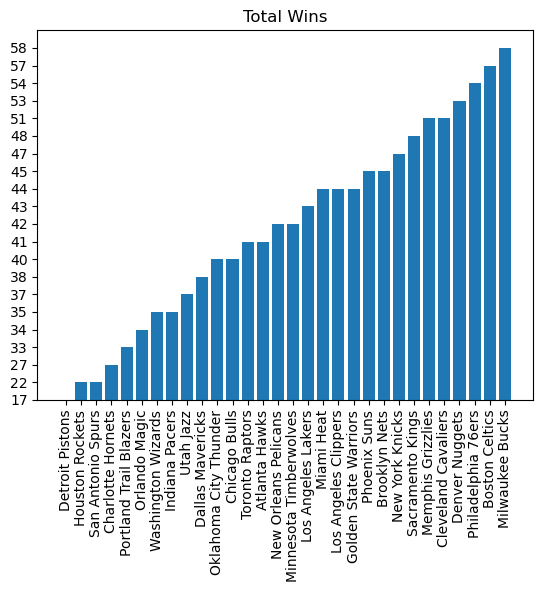

In [186]:
q = sort_split.Team
w = sort_split.Wins

plt.xticks(rotation = 'vertical')
plt.title('Total Wins')
plt.bar(q,w)

### Field Goals 

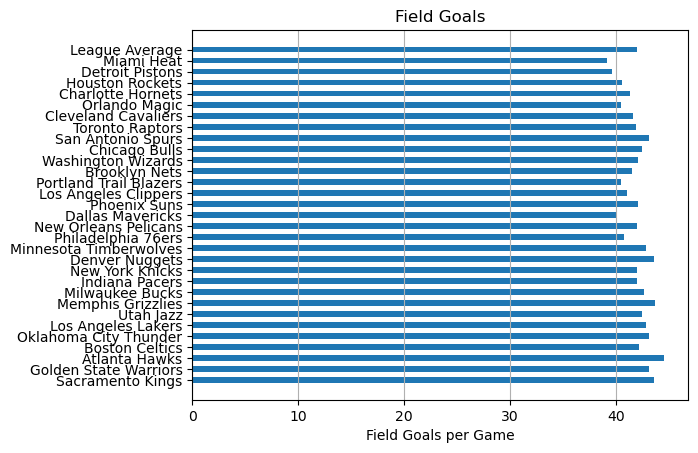

In [187]:
plt.barh(stats.Team, stats.FG, height = 0.5)

plt.title('Field Goals')
plt.xlabel('Field Goals per Game')
plt.grid(axis = 'x')

### Rebounds

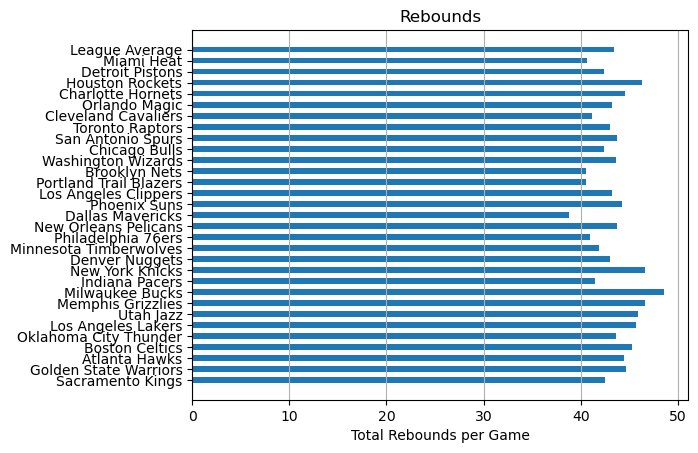

In [188]:
plt.barh(stats.Team, stats.TRB, height = 0.5)

plt.title('Rebounds')
plt.xlabel('Total Rebounds per Game')
plt.grid(axis = 'x')

### Free Throws

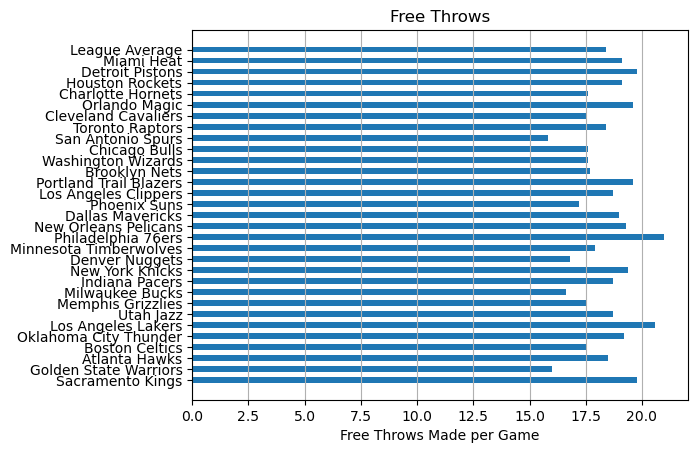

In [189]:
plt.barh(stats.Team, stats.FT, height = 0.5)

plt.title('Free Throws')
plt.xlabel('Free Throws Made per Game')
plt.grid(axis = 'x')

### Blocks

<BarContainer object of 31 artists>

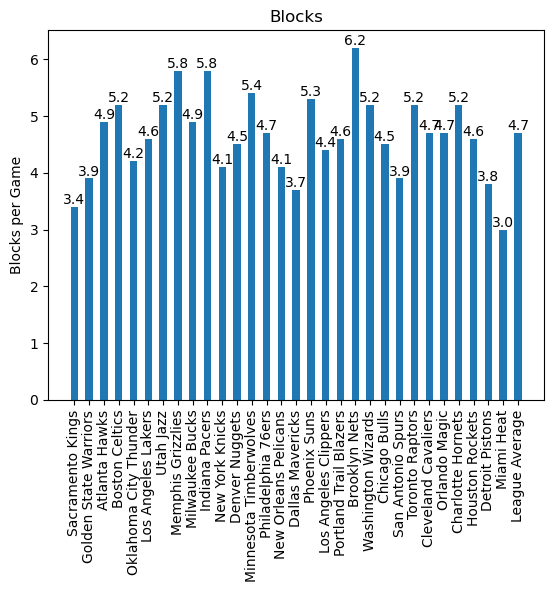

In [190]:
a = stats.Team
b = stats.BLK

for i in range(len(a)):
    plt.text(i, b[i], b[i], ha = 'center', va= 'bottom')

plt.title('Blocks')
plt.ylabel('Blocks per Game')
plt.xticks(rotation = 'vertical')

plt.bar(stats.Team, stats.BLK, width =0.5)

### Assists

<BarContainer object of 31 artists>

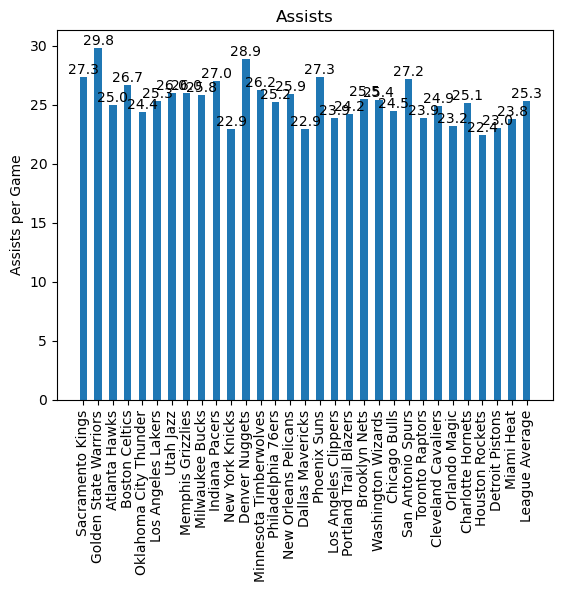

In [191]:
a = stats.Team
b = stats.AST

for i in range(len(a)):
    plt.text(i, b[i], b[i], ha = 'center', va= 'bottom')

plt.title('Assists')
plt.ylabel('Assists per Game')
plt.xticks(rotation = 'vertical')

plt.bar(stats.Team, stats.AST, width =0.5)

### Steals

<BarContainer object of 31 artists>

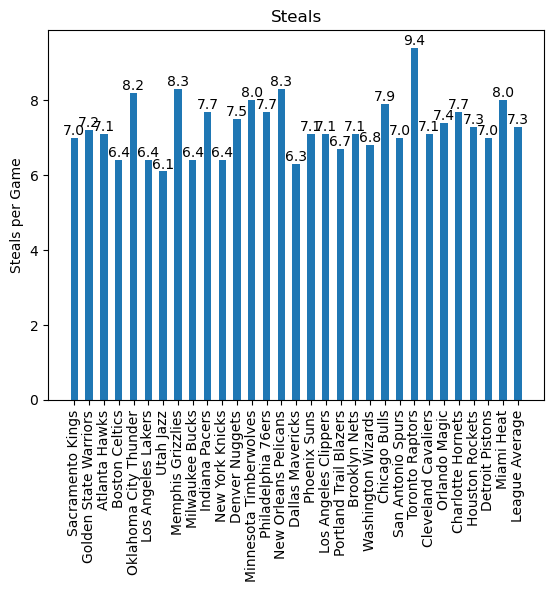

In [192]:
a = stats.Team
b = stats.STL

for i in range(len(a)):
    plt.text(i, b[i], b[i], ha = 'center', va= 'bottom')

plt.title('Steals')
plt.ylabel('Steals per Game')
plt.xticks(rotation = 'vertical')

plt.bar(stats.Team, stats.STL, width =0.5)